In [1]:
#import libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#import data file
data = pd.read_csv("cleaned_data.csv")

#drop error index
data.drop("Unnamed: 0", axis=1, inplace=True)

In [2]:
data.head()

,object_id,line_number,description,value,name
0,202000949349300500,Part IX Line 1/2,"Grants and other assistance to governments, or...",290690,Virginia Gay Hospital Health Care
1,202000949349300500,Part IX Line 25,Total functional expenses,290690,Virginia Gay Hospital Health Care
2,201233199349305998,Part IX Line 5,"Compensation of current officers, directors, a...",497157,DOVELEWIS EMERGENCY ANIMAL HOSPITAL
3,201233199349305998,Part IX Line 7,Other salaries and wages,4093138,DOVELEWIS EMERGENCY ANIMAL HOSPITAL
4,201233199349305998,Part IX Line 9,Other employee benefits,656174,DOVELEWIS EMERGENCY ANIMAL HOSPITAL


In [42]:
#get year for each object ID
o_id_str = data['object_id'].astype(str)
for i in o_id_str:
    index = data[data['object_id']== int(i)].index
    data.at[index,'year'] = i[:4]


In [48]:
# convert year to int
data['year'] = data['year'].astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472181 entries, 0 to 472180
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   object_id    472181 non-null  int64 
 1   line_number  472181 non-null  object
 2   description  472181 non-null  object
 3   value        472181 non-null  int64 
 4   name         472181 non-null  object
 5   year         472181 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 21.6+ MB


In [64]:
#check over hospital names
sorted(data['name'].unique())

['ABBEVILLE COUNTY MEMORIAL HOSPITAL',
 'ABBEVILLE COUNTY MEMORIAL HOSPITAL FOUNDATION',
 'ABBOTT NORTHWESTERN HOSPITAL FOUNDATION',
 'ABINGTON MEMORIAL HOSPITAL',
 'ABROM KAPLAN MEMORIAL HOSPITAL',
 'ACADIA GENERAL HOSPITAL INC',
 'ACC Pharmacy',
 'ACCOUNTING DEPARTMENT',
 'ACCRETIVEHEALTH INC',
 'ADAIR COUNTY HOSPITAL DISTRICT',
 'ADAMS COUNTY MEMORIAL HOSPITAL AND',
 'ADELE DUCHARME',
 'ADVANCE CARE HOSPITAL',
 'ADVANCED ANESTHESIA',
 'ADVANCED CARE HOSPITAL OF WHITE COUNTY',
 'ADVENTHEALTH DELAND',
 'ADVENTHEALTH DURAND',
 'ADVENTHEALTH HENDERSONVILLE',
 'ADVENTHEALTH MANCHESTER',
 'ADVENTHEALTH PALM COAST',
 'ADVENTHEALTH PALM COAST AUXILIARY',
 'ADVENTHEALTH ZEPHYRHILLS',
 'ADVENTIST HEALTHCARE REHABILITATION',
 'ADVENTIST HEALTHCARE SHADY GROVE',
 'ADVENTIST HEALTHCARE WHITE OAK',
 'ADVENTIST REHABILITATION HOSPITAL OF MARYLAND',
 'ADVOCATE AURORA HEALTH INC',
 'ADVOCATE SHERMAN HOSPITAL',
 'ADVOCATES FOR UPSTATE MEDICAL UNIVERSITY',
 'AH CMG Inc',
 'AHPN',
 'AITKIN COMMUNITY HO

In [77]:
hospital = set()
non_hospital = set()

for i in data['name']:
    if 'hospital' in i.lower():
        hospital.add(i)
    else:
        non_hospital.add(i)

73589

In [86]:
h_1 = set(hospital) #4426
n_1 = set(non_hospital) #1262
len(sorted(h_1))

4426

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472179 entries, 0 to 472180
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   object_id    472179 non-null  int64 
 1   line_number  472179 non-null  object
 2   description  472179 non-null  object
 3   value        472179 non-null  int64 
 4   name         472179 non-null  object
 5   year         472179 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 41.3+ MB


In [60]:
#fix names of certain hopitals
oro_index = data[data['name']=='A3R LLC DBA Vitel Net'].index
# OROVILLE HOSPITAL
data.at[oro_index,'name'] = 'OROVILLE HOSPITAL'

In [54]:
#drop the two hospitals that have been sold, hence have no expense
data.drop(205361, inplace=True)
data.drop(272135, inplace=True)


,object_id,line_number,description,value,name,year


In [ ]:
#precentage of canceled based on special request
# data2 = data.groupby(['description'])['value'].sum()
# values_total
# data2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).round(1)
# data2
for i in data['object_id']:
    print(i)
    break
    
    
data_test = data['object_id'][3]
data_plot = data[data['object_id']==data_test]
# sns.barplot(data=data_plot, y='description', x='value')
total_val = data_plot['value'].where(data_plot['description']=="Total functional expenses").sum()
val = ((data_plot['value']/total_val)*100).round(2)
data_plot.insert(4,'perc_cost',val)
data_plot.head()

In [ ]:
sns.barplot(data=data_plot, y="description", x="perc_cost")

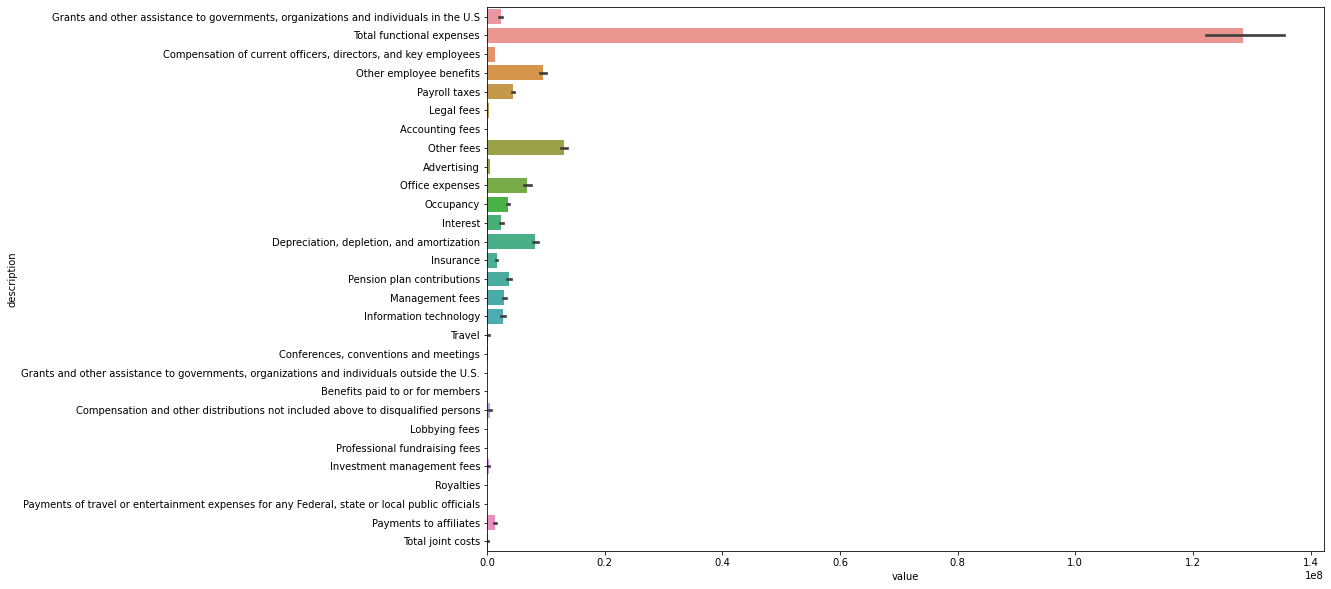

In [104]:
# df = data.drop(data[data['description']=='Total functional expenses'].index)
df = data.copy()
df = df.drop(df[df['description']=='Other salaries and wages'].index)
df = df.drop(df[df['description']=='All other expenses'].index)

plt.figure(figsize=(15,10))
sns.barplot(data=df, y='description', x='value')


In [105]:
# function to create labeled barplots


def labeled_barplot(data, x,y, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    x: x-axis
    y: y-axis
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = data['value'].where(data['description']=="Total functional expenses").sum()
    count = data[x].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.barplot(
        data=data,
        x=x,
        y=y,
        palette="Paired",
        order=data[x].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

3234445834177.0


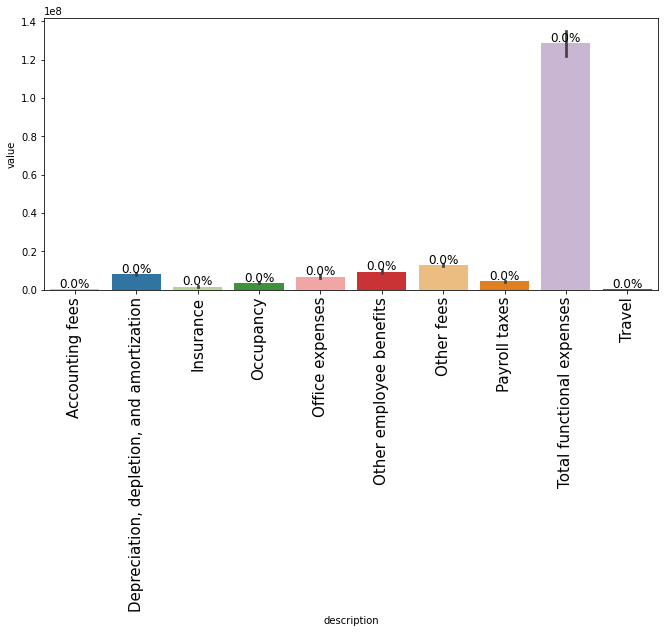

In [106]:
labeled_barplot(df, "description", y ='value', perc=True, n=10)

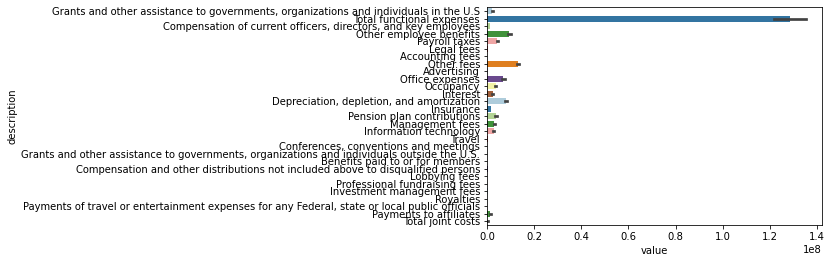

In [109]:
sns.barplot(data=df, y='description', x='value',palette="Paired")